## Finals Activity 3
*Submitted by:*  
**Christian Elijah Darvin**  
BCS32  
College of Information and Computer Studies - De La Salle University Dasmariñas

In [186]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Chris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [187]:
file_paths = glob.glob("./data/*.txt")

dataframes = []

for file in file_paths:
    df = pd.read_csv(file, sep="\t", names=["Review", "Sentiment"])
    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)
combined_df

,Review,Sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2743,I think food should have flavor and texture an...,0
2744,Appetite instantly gone.,0
2745,Overall I was not impressed and would not go b...,0
2746,"The whole experience was underwhelming, and I ...",0


### Data Preprocessing

In [188]:
combined_df["Sentiment"].value_counts()

Sentiment
1    1386
0    1362
Name: count, dtype: int64

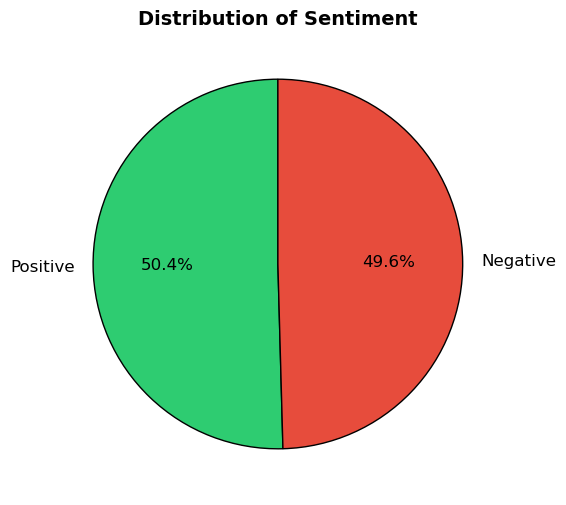

In [189]:
import matplotlib.pyplot as plt

labels = ["Positive", "Negative"]
sizes = [
    combined_df["Sentiment"].value_counts()[1],
    combined_df["Sentiment"].value_counts()[0],
]

colors = ["#2ECC71", "#E74C3C"]

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(
    sizes,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    textprops={"fontsize": 12, "color": "black"},
    wedgeprops={"edgecolor": "black", "linewidth": 1},
)

plt.title("Distribution of Sentiment", loc="center", fontsize=14, fontweight="bold")
plt.show()

In [ ]:
def preprocess_text(text, remove_stopwords=False):
    stop_words = set(stopwords.words("english"))

    tokens = word_tokenize(text.lower())

    if remove_stopwords:

        tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    return " ".join(tokens)

In [191]:
combined_df["review_cleaned_with_stopwords_removed"] = combined_df["Review"].apply(
    lambda x: preprocess_text(x, remove_stopwords=True)
)

combined_df["review_cleaned_without_stopwords_removed"] = combined_df["Review"].apply(
    lambda x: preprocess_text(x, remove_stopwords=False)
)

In [192]:
combined_df["Review"].head(10)

0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
2                               Great for the jawbone.
3    Tied to charger for conversations lasting more...
4                                    The mic is great.
5    I have to jiggle the plug to get it to line up...
6    If you have several dozen or several hundred c...
7          If you are Razr owner...you must have this!
8                  Needless to say, I wasted my money.
9                     What a waste of money and time!.
Name: Review, dtype: object

In [193]:
combined_df["review_cleaned_with_stopwords_removed"].head(10)

0                      way plug us unless go converter
1                            good case excellent value
2                                        great jawbone
3          tied charger conversations lasting problems
4                                            mic great
5         jiggle plug get line right get decent volume
6    several dozen several hundred contacts imagine...
7                                      razr owner must
8                            needless say wasted money
9                                     waste money time
Name: review_cleaned_with_stopwords_removed, dtype: object

In [194]:
combined_df["review_cleaned_without_stopwords_removed"].head(10)

0    so there is no way for me to plug it in here i...
1                        good case , excellent value .
2                              great for the jawbone .
3    tied to charger for conversations lasting more...
4                                   the mic is great .
5    i have to jiggle the plug to get it to line up...
6    if you have several dozen or several hundred c...
7       if you are razr owner ... you must have this !
8                needless to say , i wasted my money .
9                   what a waste of money and time ! .
Name: review_cleaned_without_stopwords_removed, dtype: object

In [195]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer()

X_with_stopwords_removed = vectorizer.fit_transform(
    combined_df["review_cleaned_with_stopwords_removed"]
)

X_without_stopwords_removed = vectorizer.fit_transform(
    combined_df["review_cleaned_without_stopwords_removed"]
)


y = combined_df["Sentiment"]

In [196]:
from sklearn.model_selection import train_test_split


X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X_with_stopwords_removed, y, test_size=0.3, random_state=42
)
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_without_stopwords_removed, y, test_size=0.3, random_state=42
)

In [197]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import MultinomialNB


target_names = ["Negative", "Positive"]

model1 = MultinomialNB()
model1.fit(X_train1, y_train1)
y_pred1 = model1.predict(X_test1)
accuracy1 = accuracy_score(y_test1, y_pred1)
print("Model 1 (Stopwords Removed):")
print(f"Accuracy: {accuracy1:.4f}")
print(classification_report(y_test1, y_pred1, target_names=target_names))

model2 = MultinomialNB()
model2.fit(X_train2, y_train2)
y_pred2 = model2.predict(X_test2)
accuracy2 = accuracy_score(y_test2, y_pred2)
print("\nModel 2 (Stopwords Retained):")
print(f"Accuracy: {accuracy2:.4f}")
print(classification_report(y_test2, y_pred2, target_names=target_names))

Model 1 (Stopwords Removed):
Accuracy: 0.7770
              precision    recall  f1-score   support

    Negative       0.85      0.70      0.77       435
    Positive       0.72      0.86      0.79       390

    accuracy                           0.78       825
   macro avg       0.79      0.78      0.78       825
weighted avg       0.79      0.78      0.78       825


Model 2 (Stopwords Retained):
Accuracy: 0.7903
              precision    recall  f1-score   support

    Negative       0.83      0.75      0.79       435
    Positive       0.75      0.83      0.79       390

    accuracy                           0.79       825
   macro avg       0.79      0.79      0.79       825
weighted avg       0.79      0.79      0.79       825



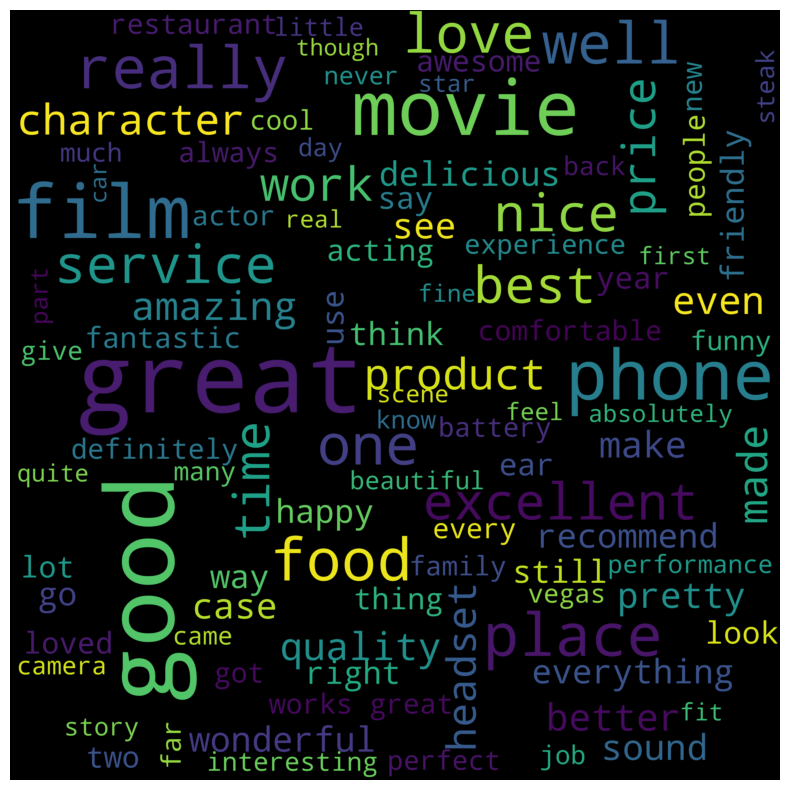

In [198]:
from wordcloud import WordCloud


word_cloud_text = " ".join(
    combined_df[combined_df["Sentiment"] == 1]["review_cleaned_with_stopwords_removed"]
)

if not word_cloud_text.strip():
    print("No negative sentiments found in the dataset.")
else:
    wordcloud = WordCloud(
        max_font_size=100,
        max_words=100,
        background_color="black",
        scale=10,
        width=800,
        height=800,
    ).generate(word_cloud_text)

    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

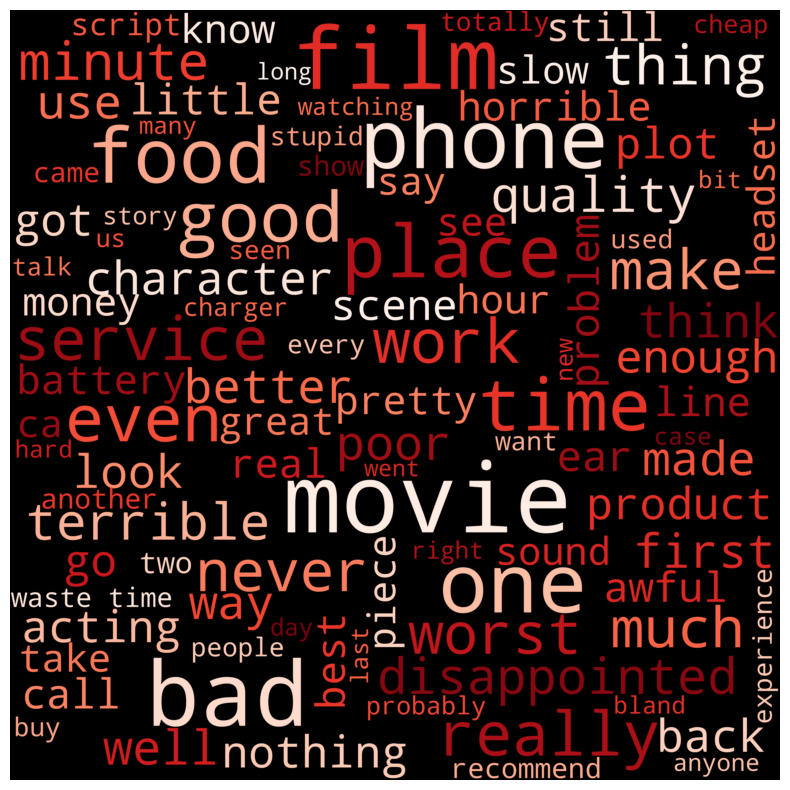

In [199]:
word_cloud_text = " ".join(
    combined_df[combined_df["Sentiment"] == 0]["review_cleaned_with_stopwords_removed"]
)

if not word_cloud_text.strip():
    print("No negative sentiments found in the dataset.")
else:
    wordcloud = WordCloud(
        max_font_size=100,
        max_words=100,
        background_color="black",
        colormap="Reds",
        scale=10,
        width=800,
        height=800,
    ).generate(word_cloud_text)

    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()